In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
  def forward(self,x:torch.tensor)-> torch.tensor:
    return self.weights*x+self.bias

This code defines a LinearRegression class that implements a basic linear regression model. It predicts a continuous value based on a single input feature.

1. **class LinearRegression(nn.Module):**

  This line inherits from nn.Module, the foundation for building neural networks in PyTorch.

  Inheritance provides essential features like automatic differentiation for training the model.

2. **Initialization (__init__ function):**

  This method initializes the model's parameters when you create an instance (e.g., model = LinearRegression()).

3. **super().__init__()**

  Initializes the inherited attributes and functionalities from the parent class (nn.Module).

4. **self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))**

  Creates a parameter named weights using nn.Parameter. This ensures the tensor is tracked for gradient calculation during training.

5. **torch.randn(1, dtype=torch.float, requires_grad=True)**:

  Initializes the weights tensor with random values of size (1,) (a single value), representing the coefficient m.

  **dtype** : Sets the data type to torch.float for floating-point numbers.

  **requires_grad** : Sets it True to track gradients for weight updates during training.

6. self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))

  Creates a parameter named bias 'b' similar to weights.

3. **def forward(self, x: torch.tensor) -> torch.tensor:**

  This method defines the model's forward pass, which takes the input data (x) and calculates the predicted output.

  return self.weights * x + self.bias

Performs the core linear regression calculation Y = m * X + b


In [ ]:
# Create an Ideal Line data for testing

weights = 0.8
bias = 0.2
start = 0
end = 1
steps = 0.01
X = torch.arange(start,end,steps)
y = X*weights + bias
split = int( 0.8*len(X))
Xtrain , ytrain = X[:split], y[:split]
Xtest , ytest = X[split:],y[split:]
print(len(Xtrain),len(ytrain),len(Xtest),len(ytest))


80 80 20 20


In [ ]:
ytest.dtype

torch.float32

In [ ]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# instantiate the class
model = LinearRegression()

# Check the nn.Parameter(s) within the nn.Module subclass we created
param = model.parameters()
list(param)

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# get the state (what the model contains) of the model using .state_dict().
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Regarding with statement:
# with open('file_path', 'w') as file:
    # file.write('hello world !')
# Note that the with statement here acts as an environment, automatically acquires and releases resources

In [ ]:
# Making predictions using torch.inference_mode()
# When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.
with torch.inference_mode():
  ypred = model(Xtest)

# we used torch.inference_mode() as a context manager to make the predictions.

# torch.inference_mode() is used when using a model for inference (making predictions).

# torch.inference_mode() turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the forward() method) faster.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
mean_squared_error(ytest,ypred)

0.2367666

In [ ]:
r2_score(ytest,ypred)

-110.26250739718242

In [ ]:
def plot_pred(Xtrain,ytrain, Xtest,ytest,ypred=None):
  #plt.figure(figsize=(8,4))
  plt.plot(Xtrain,ytrain,c='b',label='training pts')
  plt.plot(Xtest,ytest,c='g',label='test pts')
  plt.plot(Xtest,ypred,c='r',label='test pts')
  plt.legend()

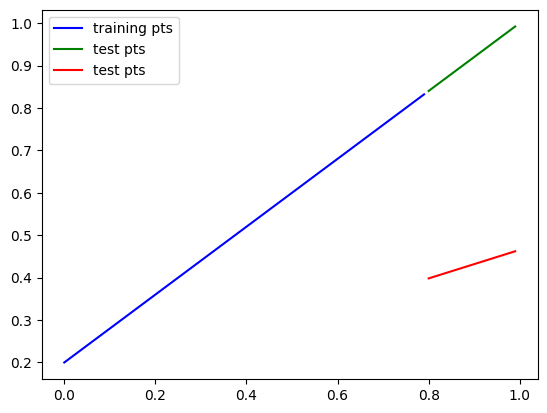

In [ ]:
plot_pred(Xtrain,ytrain,Xtest,ytest,ypred)

# Train Model

**Loss function**
	Measures how wrong your models predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test).
  Lower the better.
  
  PyTorch has plenty of built-in loss functions in torch.nn.
  
  Mean absolute error (MAE) for regression problems (torch.nn.L1Loss()).

  Binary cross entropy for binary classification problems (torch.nn.BCELoss()).
  
  # ----------------------------------------------

**Optimizer**	Tells your model how to update its internal parameters to best lower the loss.

There are various optimization fn implementations in torch.optim.

Stochastic gradient descent (torch.optim.SGD()).

Adam optimizer (torch.optim.Adam()).

In [ ]:
mae = nn.L1Loss() # Mean absolute error (MAE, in PyTorch: torch.nn.L1Loss)
optim = torch.optim.SGD(params = model.parameters(), lr = 0.01 ) # torch.optim.SGD(model_params, learning_rate)

**Creating an optimization loop in PyTorch**

Consists of Training and Testing parts run for a number of epochs:

**In Training:**

  Put the model in Training Mode : model.train()

  Forward pass : Get ypred for trianing pts by model(Xtrain)

  Calculate the loss : calculate loss by loss = loss_fn(ypred,ytrain)

  Optimizers gradients :  are set to zero  so they can be recalculated for the specific training step by optim.zero_grad()

  Backward Propogation : apply on loss data obtained from lossfn to update gradients, loss.backward()

  Update the optimizer : all params with requires_grad = True are updated wrt gradients, optim.step()

**In Testing**

  Put the model in Test mode : model.eval()

  Enter the inference_mode

  Get ypred for Test data : ypred = model(Xtest)

  Loss for Test Data : Calculate using loss = lossfn(ypred,ytest)

  Display loss : At every few epochs update 3 arrays, train_loss_values, test_loss_values, epoch_count and print the same for each epoch.












In [ ]:
torch.manual_seed(42)

epochs = 1000

epoch_cnt = []
train_loss = []
test_loss = []

for i in range(epochs):
  #Training Part
  model.train()
  ypred = model(ytrain)
  loss1 = mae(ypred,ytrain)
  optim.zero_grad()
  loss1.backward() #apply on the result of lossfn not the lossfn itself
  optim.step()
  #Testing Part
  model.eval()
  with torch.inference_mode():
    ypred = model(Xtest)
    loss2 = mae(ypred,ytest)
    if i %10 ==0:
      epoch_cnt.append(i)
      train_loss.append(loss1.detach().numpy()) # .detach(): It isolates the loss value from the computational graph, making it a simple Python number for storing and visualizing.
                                                # .numpy(): Converts the PyTorch tensor into a NumPy array, compatible with plotting libraries like Matplotlib.
      test_loss.append(loss2.detach().numpy())
      print(f"for epoch {i}, the train loss : {loss1}, the test loss : {loss2}")


for epoch 0, the train loss : 0.2134583443403244, the test loss : 0.4712345004081726
for epoch 10, the train loss : 0.12975099682807922, the test loss : 0.3564964830875397
for epoch 20, the train loss : 0.10007001459598541, the test loss : 0.28709572553634644
for epoch 30, the train loss : 0.09014905244112015, the test loss : 0.24836869537830353
for epoch 40, the train loss : 0.08608438074588776, the test loss : 0.22606053948402405
for epoch 50, the train loss : 0.08362151682376862, the test loss : 0.21357235312461853
for epoch 60, the train loss : 0.08151166141033173, the test loss : 0.2054928094148636
for epoch 70, the train loss : 0.07947142422199249, the test loss : 0.19851763546466827
for epoch 80, the train loss : 0.07745961099863052, the test loss : 0.19376201927661896
for epoch 90, the train loss : 0.07545603811740875, the test loss : 0.18900641798973083
for epoch 100, the train loss : 0.07345364987850189, the test loss : 0.18462073802947998
for epoch 110, the train loss : 0.07

# Plotting Curves

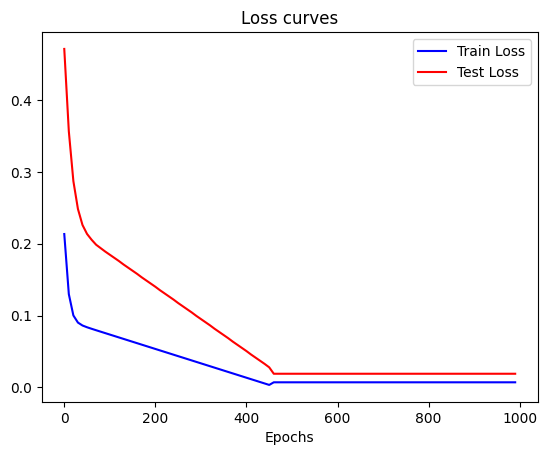

In [ ]:
plt.plot(epoch_cnt,train_loss,label = 'Train Loss', c= 'b')
plt.plot(epoch_cnt,test_loss,label='Test Loss', c = 'r')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Find Models params

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.9854])), ('bias', tensor([0.0006]))])

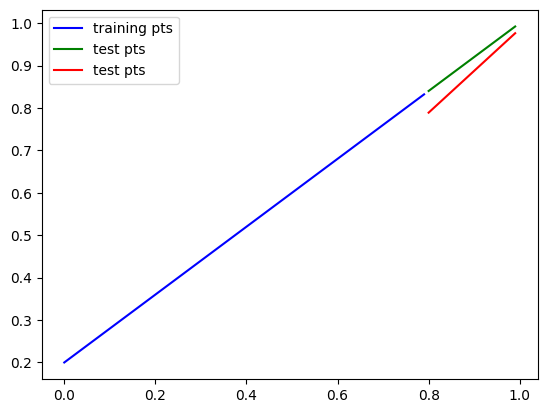

In [ ]:
plot_pred(Xtrain,ytrain,Xtest,ytest,ypred)

# Model Save and Load

In [ ]:
from pathlib import Path

modelpath = Path("models")      # create a Directory
modelpath.mkdir(parents=True, exist_ok=True)  # put created directory in current path

                                        # parents tells how the method handles missing parent directories. There are two options:
                                              # With the default False, Path.mkdir() generates the FileNotFoundError exception when one or
                                              # more parent directories are missing. So the standard behaviour is not to make those directories.
                                              # With True, Path.mkdir() makes any missing parent directories in the specified path.
                                       # exist_ok controls how the method handles existing paths. Options are:
                                              # With the default False, Path.mkdir() raises the FileExistsError when the path already exists.
                                              # With True, Path.mkdir() the method fails silently when the path already exists.
modelname = 'lin regression pytorch.pt'

fullpath = modelpath / modelname

print(fullpath)
torch.save(obj = model.state_dict(),f = fullpath) # save the model's state dictionary onto the path created




models/lin regression pytorch.pt


In [ ]:
!ls

models	sample_data


In [ ]:
model = torch.load(f = fullpath)           # load the model's state dictionary

In [ ]:
model

OrderedDict([('weights', tensor([0.9854])), ('bias', tensor([0.0006]))])

# Using Pre built Classes like nn.Linear()

In [ ]:
class LinearRegression2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)
                                                                      # Note that simple Lin Reg is same as single neuron with one input feature
                                                                      # and one single output. The multilinear Reg would have single neuron,
                                                                      # more than 1 input features and single output.
                                                                      # This code defines the linear layer itself using the nn.Linear class from PyTorch's nn module.
                                                                      # This class is used to create fully-connected layers, which are essential components of many neural networks.
# In essence, this line creates a linear layer that takes a single input value, performs a linear transformation on it using weights and biases,
# and finally outputs a single value.

  def forward(self,x:torch.tensor)->torch.tensor:
    return self.linear_layer(x)
                                                                      # This method takes an input tensor x, passes it through the linear layer
                                                                      # stored in the linear_layer member variable, and returns the transformed
                                                                      # output as another tensor.

In [ ]:
torch.manual_seed(42)

model2 = LinearRegression2()

print(model2.state_dict())

#with torch.inference_mode():
#  ypred3 = model2(Xtest)
# plot_pred(ypred3)

OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


And the Rest of the gradient descent can be followed for this one
as well.